# Research of advertisements for the sale of apartments

We have data from the Yandex.Real Estate service at our disposal - an archive of advertisements for the sale of apartments in St. Petersburg and neighboring settlements for several years. You need to learn how to determine the market value of real estate. The task is to set parameters. This will allow you to build an automated system: it will track anomalies and fraudulent activity.

For each apartment for sale, two types of data are available. The first ones are entered by the user, the second ones are obtained automatically based on cartographic data. For example, the distance to the center, airport, nearest park or pond.

# Importing libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Open the data file and review the general information.

In [2]:
try:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
except FileNotFoundError:
    data = pd.read_csv(r'C:\Users\ASUS\Desktop\Практикум\Data\real_estate_data.csv', sep='\t')

In [3]:
data.info()
print(data.head(15))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [4]:
display(data.head(15))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

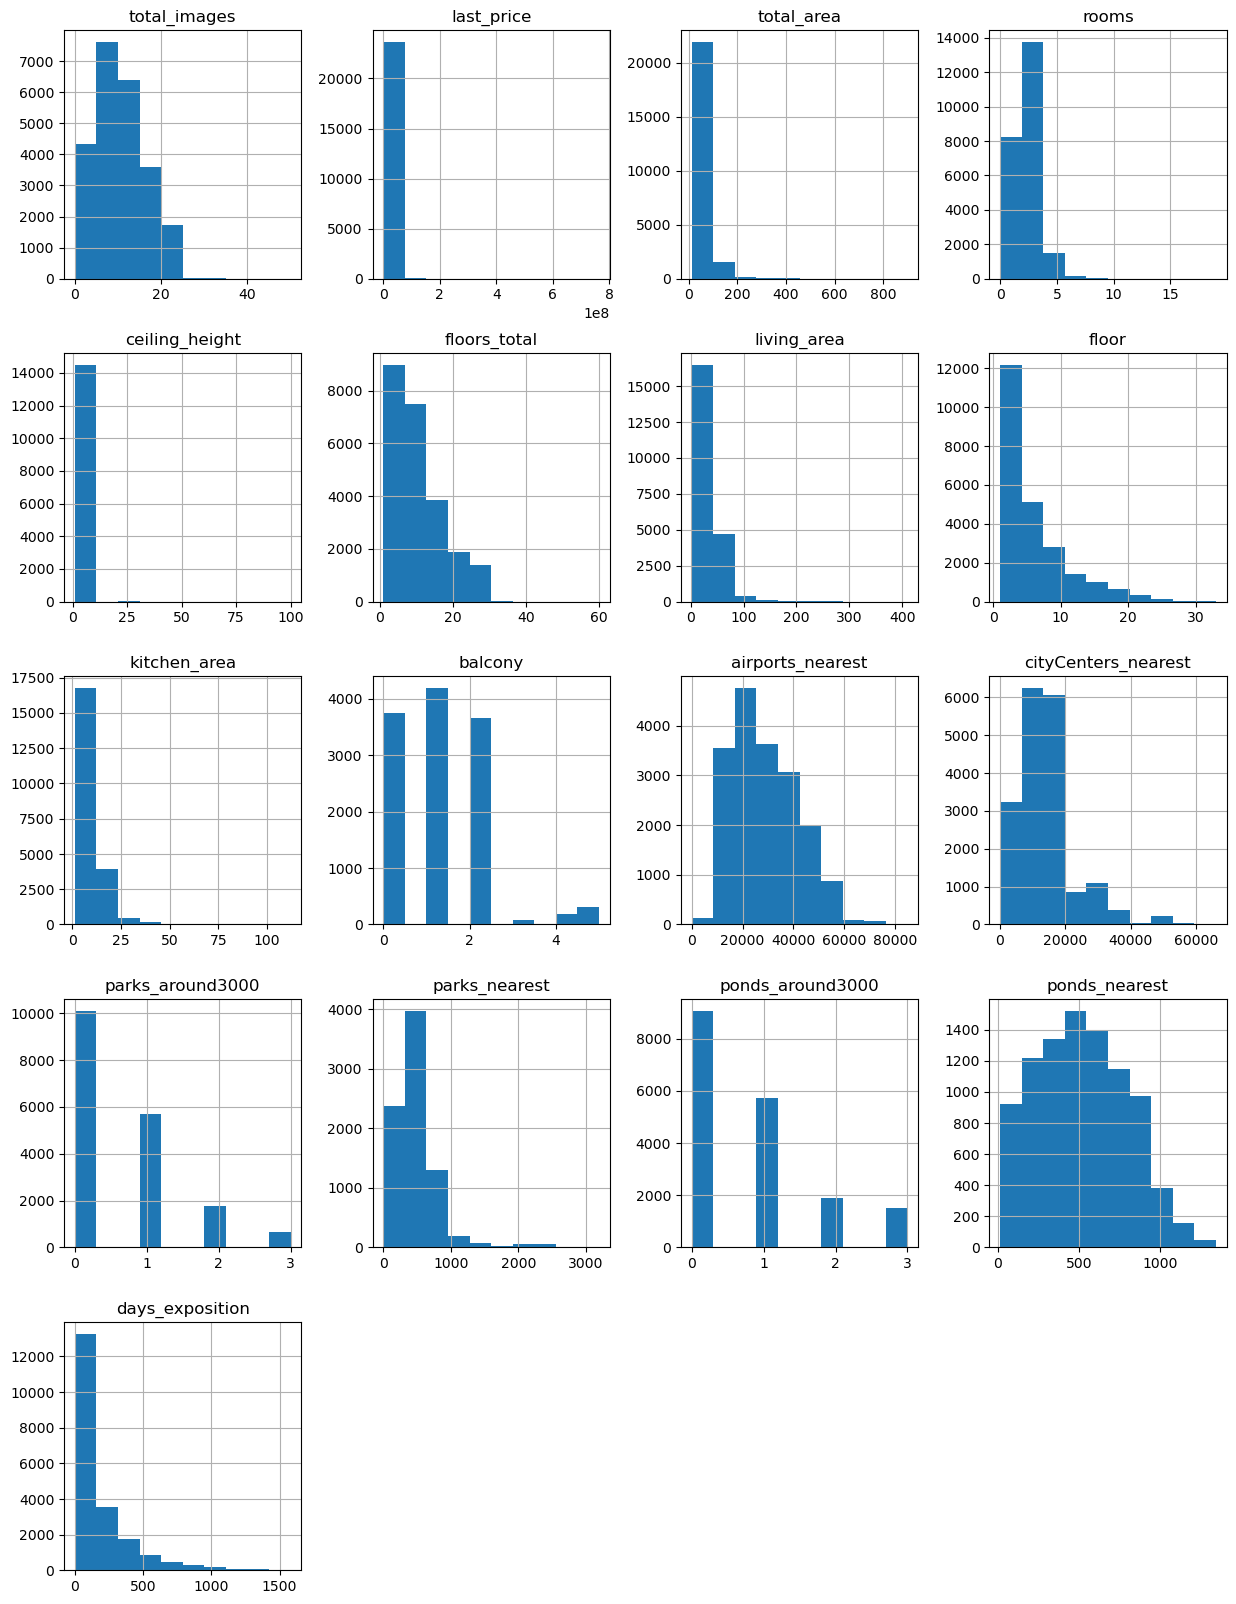

In [6]:
data.hist(figsize=(15, 20));

The database contains information about 23,699 advertisements for the sale of apartments. There are missing values and incorrect data types.

# Data preprocessing 

In [7]:
print(data.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64


Let's replace gaps in "living_area" with "Unknown"
Since apartments are a fairly new phenomenon in Russia, gaps in this column are most likely a negative value.
Users most likely did not fill out data on the balcony if it was missing.
Gaps in "days_exposition" could conceivably be due to problems, such as an erroneous ad that was immediately removed.

A map program error may cause gaps in map data types.

In [8]:
data['locality_name'] = data['locality_name'].fillna("unknow")
data['is_apartment'] = data['is_apartment'].fillna(False)
data['balcony'] = data['balcony'].fillna(0)
data.dropna(subset = ['floors_total'],inplace = True)
data['days_exposition'] = data['days_exposition'].fillna(0)

In [9]:
def categorize_price(price):
    try:
        if 0 <= price <= 3000000:
            return 'D'
        elif 3000001 <= price <= 5000000:
            return 'C'
        elif 5000001 <= price <= 20000000:
            return 'B'
        elif 20000001 <= price:
            return 'A'
    except:
        pass
    
data['price_category'] = data['last_price'].apply(categorize_price)
ceiling_median = data.groupby('price_category')['ceiling_height'].transform('median')
data['ceiling_height'] = data['ceiling_height'].fillna(ceiling_median)

In [10]:
data.loc[data['studio'] == True, 'kitchen_area'] = 0
living_ratio = data['living_area'].mean() / data['total_area'].mean()
kitchen_ratio = data['kitchen_area'].mean() / data['total_area'].mean()
data['living_area'].fillna(living_ratio * data['total_area'], inplace=True)
data['kitchen_area'].fillna(kitchen_ratio * data['total_area'], inplace=True)


In [11]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data['floors_total'] = data['floors_total'].astype(int)
data['balcony'] = data['balcony'].astype(int)
data['airports_nearest'] = data['airports_nearest'].fillna(0).astype(int)
data['cityCenters_nearest'] = data['cityCenters_nearest'].fillna(0).astype(int)
data['parks_around3000'] = data['parks_around3000'].fillna(0).astype(int)
data['parks_nearest'] = data['parks_nearest'].fillna(0).astype(int)
data['ponds_around3000'] = data['ponds_around3000'].fillna(0).astype(int)
data['ponds_nearest'] = data['ponds_nearest'].fillna(0).astype(int)
data['days_exposition'] = data['days_exposition'].astype(int)

airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000 ,ponds_nearest ,days_exposition, balcony, floors_total - type must be "int"

In "first_day_exposition" we change "object" to "datetime"


Let's convert all the names of "locality_name" points to "Населённый пункт" (Settlement)

In [12]:
data['locality_name'] = data['locality_name'].str.replace('\\bпосёлок\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bкоттеджный поселок\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bпоселок при железнодорожной станции\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bпоселок станции\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bпоселок городского типа\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bгородской поселок\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bсадовое товарищество\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bсадоводческое некоммерческое товарищество\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\bсело\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\деревня\\b','поселок',regex=True)
data['locality_name'] = data['locality_name'].str.replace('\\поселок\\b','Населённый пункт',regex=True)

In [13]:
data.loc[data['ceiling_height'] > 10,'ceiling_height'] = data['ceiling_height']/10
data.loc[data['ceiling_height'] < 2.2,'ceiling_height'] = ceiling_median

### Count and add new columns to the table

In [14]:

data['sqm_price'] = data['last_price']/data['total_area']

data['day_of_publication'] = data['first_day_exposition'].dt.weekday
data['month_of_publication'] = data['first_day_exposition'].dt.month
data['year_of_publication'] = data['first_day_exposition'].dt.year

def floor_group(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'
data['floor_type'] = data.apply(floor_group, axis=1)


data['cityCenters_nearest'] = data['cityCenters_nearest']/1000
data['cityCenters_nearest'] = round(data['cityCenters_nearest'])

### Exploratory data analysis

Top 15 objects by total area
19540    900.0
12859    631.2
3117     631.0
15651    618.0
5358     590.0
4237     517.0
8018     507.0
5893     500.0
15016    500.0
12401    495.0
9826     494.1
22494    491.0
6621     488.0
660      483.9
6221     470.3
Name: total_area, dtype: float64


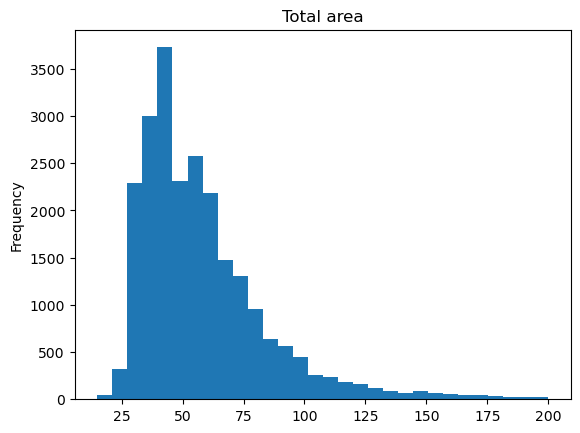

In [15]:
data['total_area'].plot(
    title = 'Total area',kind='hist',bins=30,range=(15,200))
print('Top 15 objects by total area')
print(data['total_area'].sort_values(ascending=False).head(15))

Most apartments are in the range between 40 and 70 sq.m. The largest apartments reach an area of 900 sq.m.

Top 15 objects by living area
19540    409.700000
5358     409.000000
3117     360.387312
12401    347.500000
4237     332.000000
12859    322.300000
660      312.500000
8018     301.500000
14088    300.000000
15016    285.568393
5893     285.568393
9826     282.198686
20273    279.600000
22494    274.000000
14498    264.500000
Name: living_area, dtype: float64


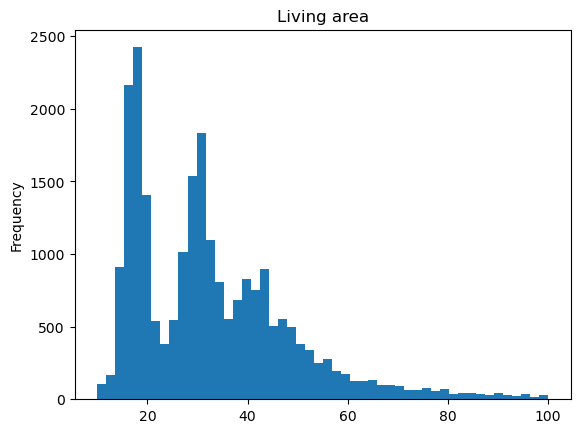

In [16]:
data['living_area'].plot(
    title = 'Living area', kind='hist',bins=50,range=(10,100))
print('Top 15 objects by living area')
print(data['living_area'].sort_values(ascending=False).head(15))

Most apartments have living area in the range between 20 and 45 sq.m.
The largest apartments reach an area of 409 sq.m.

Top 15 objects by kitchen area
19540    112.000000
20215    107.000000
2489     100.700000
5358     100.000000
16239     93.200000
16797     93.000000
10867     87.200000
15016     86.943697
9826      85.917761
4394      77.000000
492       77.000000
14644     75.000000
22131     73.415257
16647     72.000000
6193      70.000000
Name: kitchen_area, dtype: float64


count    23613.000000
mean        10.466815
std          6.073965
min          0.000000
25%          7.000000
50%          9.000000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

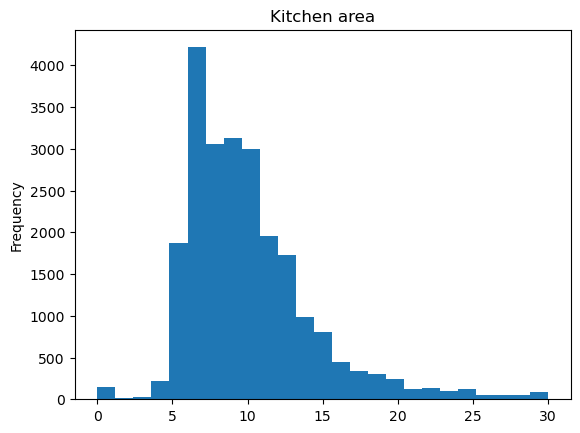

In [17]:
data['kitchen_area'].plot(
    title = 'Kitchen area',kind='hist',bins=25,range=(0,30))
print('Top 15 objects by kitchen area')
print(data['kitchen_area'].sort_values(ascending=False).head(15))
data['kitchen_area'].describe()

In most apartments, the kitchen area is in the range between 7 and 12 sq.m.
The largest apartments reach an area of 112 sq.m.

Most apartments are less than 100 square meters; larger areas are practically never found. The selection includes several very large and strange options with an area of more than 200 square meters.

Top 15 objects by price, million.
12971    763
19540    420
14706    401
1436     330
15651    300
22831    289
16461    245
13749    240
5893     230
8900     190
19865    180
19155    160
16495    159
2536     159
1026     155
Name: last_price, dtype: int32


count    23613.000000
mean         6.540555
std         10.901723
min          0.012190
25%          3.400000
50%          4.650000
75%          6.799000
max        763.000000
Name: last_price, dtype: float64

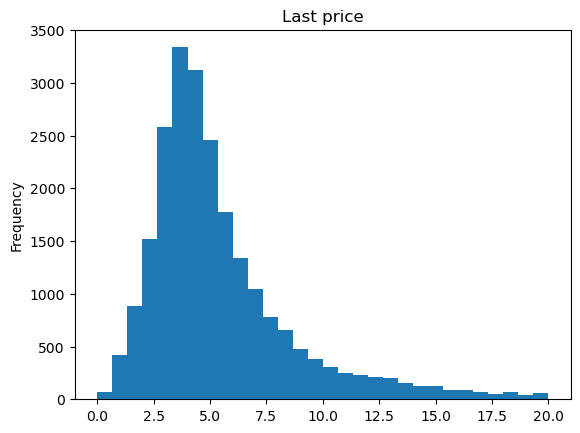

In [18]:
(data['last_price']/1000000).plot(
    title = 'Last price', kind='hist',bins=30,range=(0,20))
print('Top 15 objects by price, million.')
print((data['last_price']/1000000).astype(int).sort_values(ascending=False).head(15))
(data['last_price']/1000000).describe()

The majority of apartments cost from 3.4 million to 6.8 million
The most expensive apartment was listed for 763 million.

Top 15 properties by number of rooms
14498    19
18848    16
5358     15
20829    14
866      14
19540    12
9688     11
648      11
18119    10
18891    10
4149     10
13019     9
16915     9
13397     9
8822      9
Name: rooms, dtype: int64


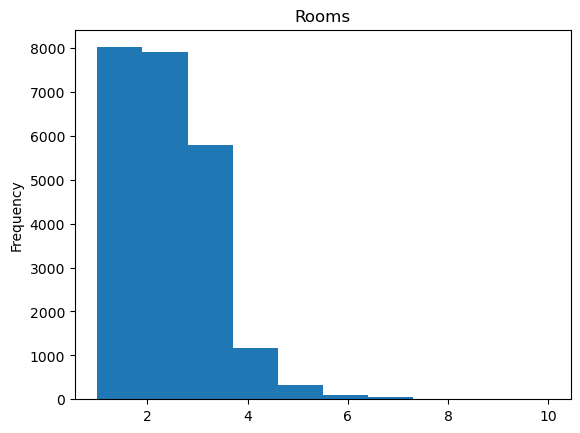

In [19]:
data['rooms'].plot(
    title = 'Rooms',kind='hist',bins=10,range=(1,10))
print('Top 15 properties by number of rooms')
print(data['rooms'].sort_values(ascending=False).head(15))

Mostly apartments have 1-3 rooms

Top 15 objects by ceiling height
22869    10.0
5863      8.3
3474      8.0
15743     8.0
17442     8.0
20264     6.0
21227     5.8
1388      5.6
7578      5.5
12628     5.3
1026      5.3
464       5.2
1053      5.0
21923     4.9
2802      4.8
Name: ceiling_height, dtype: float64


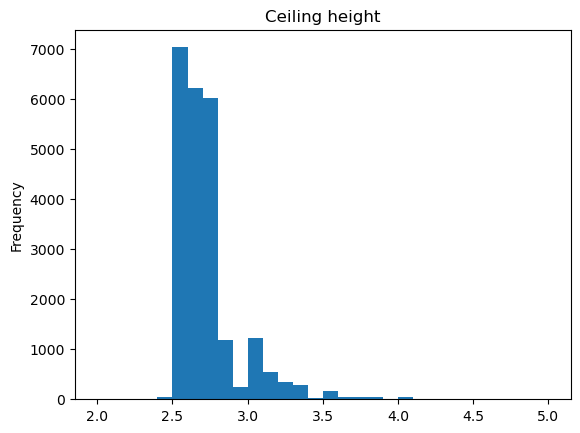

In [20]:
data['ceiling_height'].plot(
    title = 'Ceiling height',kind='hist',bins=30,range=(2,5))
print('Top 15 objects by ceiling height')
print(data['ceiling_height'].sort_values(ascending=False).head(15))

Most apartments have ceiling heights from 2.5 m to 2.9 m
Ceiling heights reach 10 m

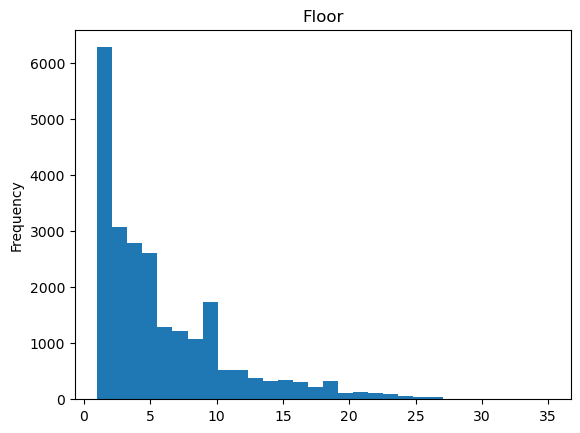

In [21]:
data['floor'].plot(
    title = 'Floor',kind='hist',bins=30,range=(1,35));

Most apartments in advertisements are located between the 2nd and 8th floors inclusive

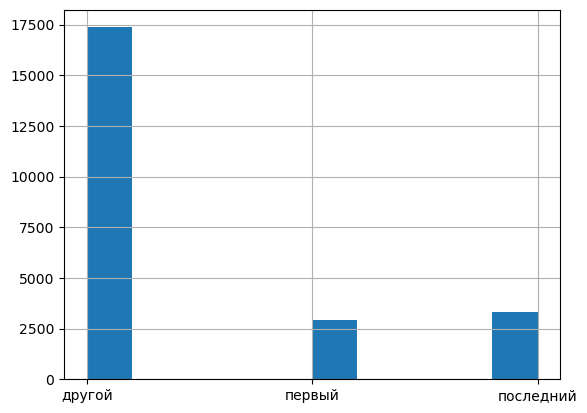

In [22]:
data['floor_type'].hist();

There are fewer apartments on the first and last floors than on others

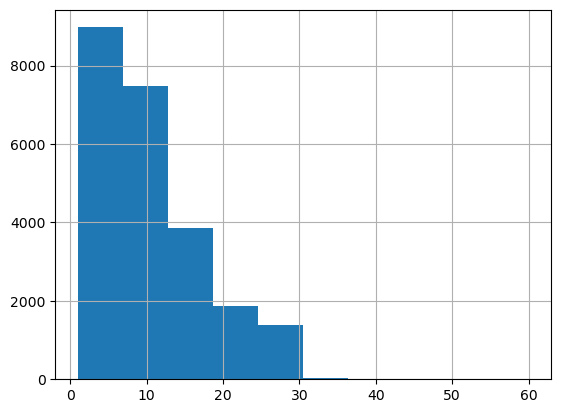

In [23]:
data['floors_total'].hist();

Most of the apartments in the advertisements are in buildings with a height of 5 to 16 floors.
The tallest building is 60 floors high

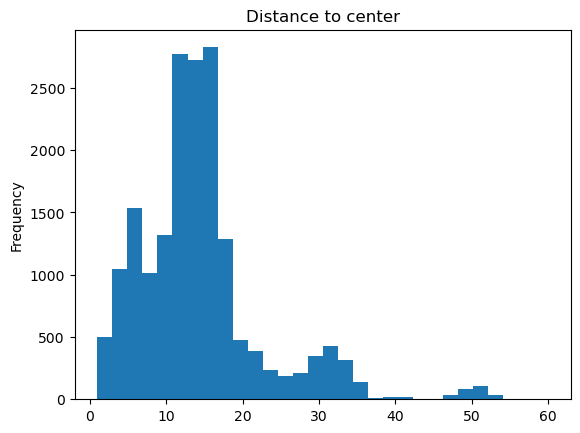

In [24]:
data['cityCenters_nearest'].plot(
    title = 'Distance to center',xlabel = 'meters',ylabel = 'Number of apartments',
    kind='hist',bins=30,range=(1,60));

Most of the apartments in the advertisements are located at a distance of 2 to 15 km. from the city center

Top 15 objects by distance to parks
14624     1
11949     3
22941     4
9344      7
20193     9
2527      9
4470     10
21773    10
189      10
214      10
7788     10
19093    10
15296    10
19215    11
21167    11
Name: parks_nearest, dtype: int32


count    8045.000000
mean      490.554630
std       341.336698
min         1.000000
25%       288.000000
50%       455.000000
75%       612.000000
max      3190.000000
Name: parks_nearest, dtype: float64

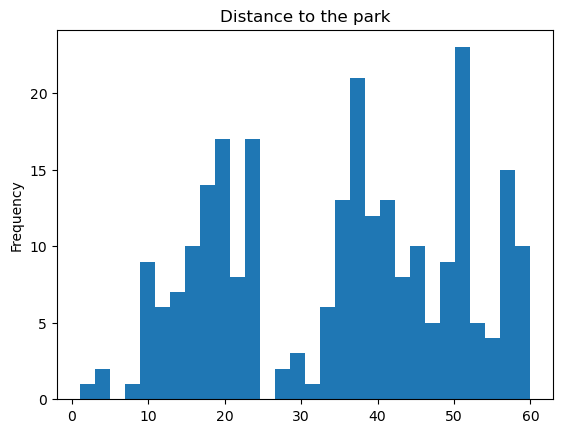

In [27]:
data['parks_nearest'].plot(
    title = 'Distance to the park',xlabel = 'метры',ylabel = 'Количество квартир',
    kind='hist',bins=30,range=(1,60))
print('Top 15 objects by distance to parks')
print(data.query('parks_nearest != 0')['parks_nearest'].sort_values().head(15))
data.query('parks_nearest != 0')['parks_nearest'].describe()

Most of the apartments in the advertisements are located at a distance from 288 to 612 m from the park.

Top 15 objects by distance to ponds
17585    13
1548     13
18845    16
22077    16
10358    16
8785     16
20427    16
9311     16
23343    16
1733     16
2564     19
13411    19
14974    19
16687    19
23015    20
Name: ponds_nearest, dtype: int32


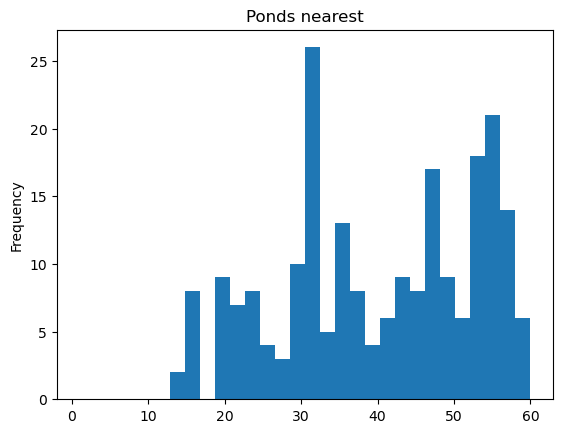

In [29]:
data['ponds_nearest'].plot(
    title = 'Ponds nearest',xlabel = 'метры',ylabel = 'Количество квартир',
    kind='hist',bins=30,range=(1,60))
print('Top 15 objects by distance to ponds')
print(data.query('ponds_nearest != 0')['ponds_nearest'].sort_values().head(15))


Most of the apartments in the advertisements are located at a distance of 290 to 730 m from the ponds.

Top 15 objects by distance to airport
9640     84869
5340     84853
577      84665
20746    84006
5218     83758
18884    81607
2974     81355
4441     78527
939      75646
376      73827
6247     73547
22941    73391
22855    73115
11244    72713
18096    72469
Name: airports_nearest, dtype: int32


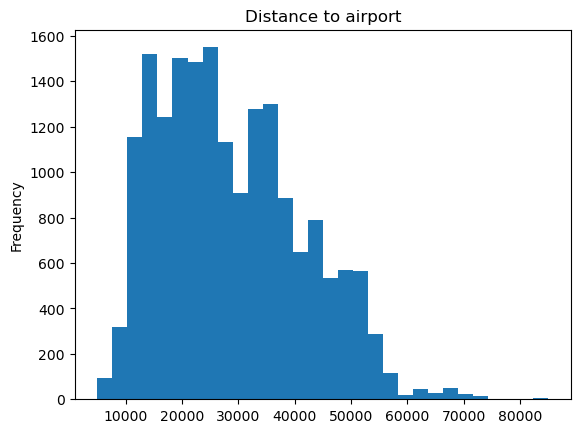

In [30]:
data['airports_nearest'].plot(
    title = 'Distance to airport',xlabel = 'метры',ylabel = 'Количество квартир',
    kind='hist',bins=30,range=(5000,85000))
print('Top 15 objects by distance to airport')
print(data.query('airports_nearest != 0')['airports_nearest'].sort_values(ascending = False).head(15))

The apartments are mostly located between 18 and 37 km from the airport

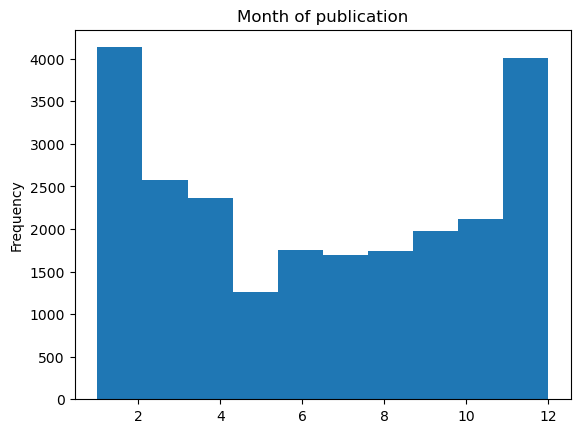

In [32]:
data['month_of_publication'].plot(kind = 'hist',title = 'Month of publication');

Most often, advertisements are published at the beginning and end of the year.

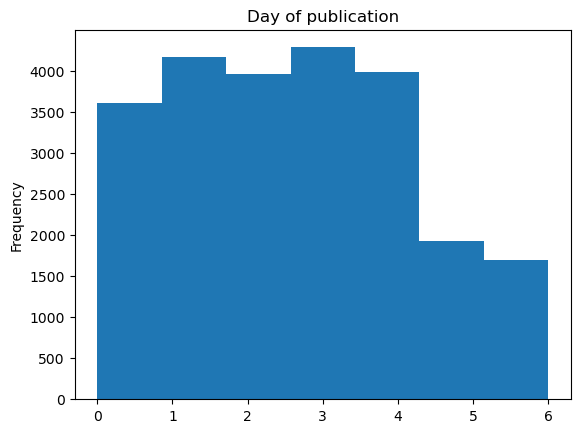

In [33]:
data['day_of_publication'].plot(kind = 'hist',bins=7,title = 'Day of publication');

Most advertisements are published on work days

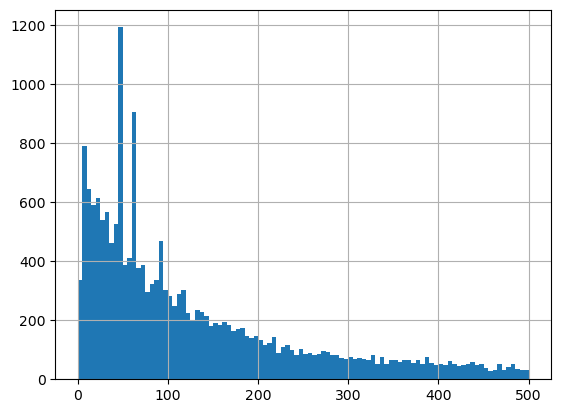

In [34]:
data.query('days_exposition != 0')['days_exposition'].hist(bins=100,range = (0,500));

In [35]:
data.query('days_exposition != 0')['days_exposition'].describe()

count    20441.000000
mean       180.884839
std        219.685543
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

The median time to sell is 95 days. The average time of sale is 180 days.
Most apartments are sold within 95 days. There are a large number of apartments sold in just a few days after publication. There are also options that have been on sale for several dozen months.
A quick sale can be defined as a period of 45 days or less. Long sale - 232 days or longer.

The dataframe discards values based on 1.5 quantile.

In [36]:
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
list_features = ['last_price', 'total_area', 'kitchen_area', 'living_area', 'days_exposition','rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

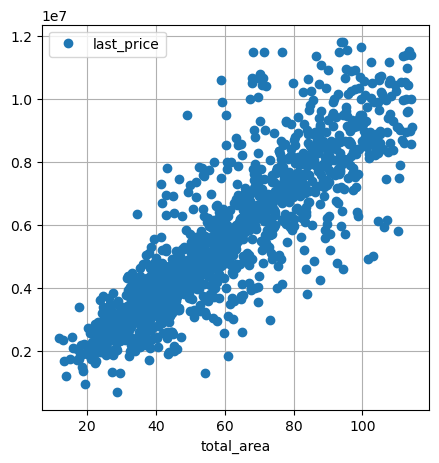

Correlation of price and area: 

            last_price  total_area
last_price    1.000000    0.905269
total_area    0.905269    1.000000 



In [38]:
data.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Correlation of price and area:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

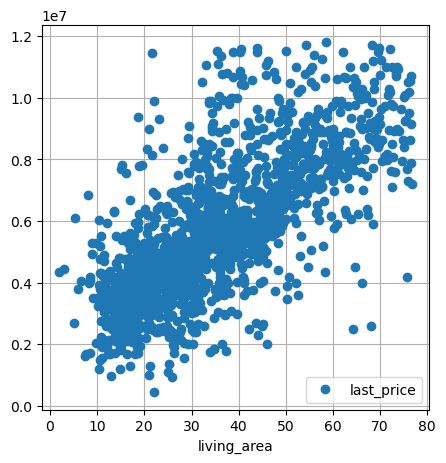

Correlation of price and living space: 

             last_price  living_area
last_price     1.000000     0.729416
living_area    0.729416     1.000000 



In [39]:
data.pivot_table(index='living_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Correlation of price and living space:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

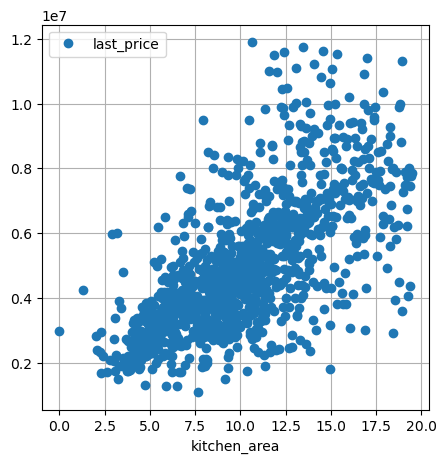

Correlation between price and kitchen area: 

              kitchen_area  last_price
kitchen_area      1.000000    0.448033
last_price        0.448033    1.000000 



In [40]:
data.pivot_table(index='kitchen_area', values='last_price').plot(grid=True, style='o', figsize=(5, 5))
plt.show()
print('Correlation between price and kitchen area:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

The price depends most strongly on the total footage of the apartment and a little less on the living space. The dependence on the kitchen area is quite weak, because in large multi-room apartments there is most likely only one kitchen

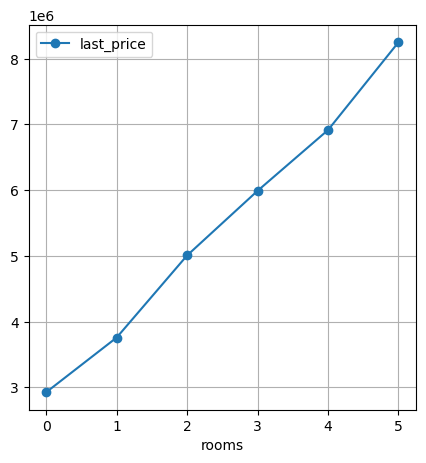

Correlation of price and number of rooms: 

            last_price     rooms
last_price    1.000000  0.551261
rooms         0.551261  1.000000 



In [41]:
data.pivot_table(index='rooms', values='last_price').plot(grid=True, style='o-', figsize=(5, 5))
plt.show()
print('Correlation of price and number of rooms:','\n')
print(data.pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

There is a dependence of the price on the number of rooms, but it is lower than depending on the area

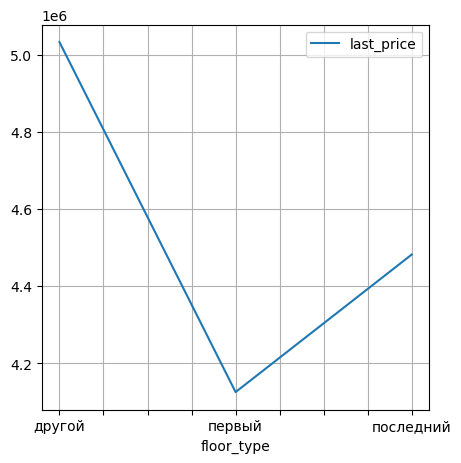

In [42]:
data.pivot_table(index='floor_type', values='last_price').plot(grid=True, figsize=(5, 5))
plt.show()

Apartments on the first floor are the cheapest, on the last floor the most expensive and the most expensive apartments on the remaining floors

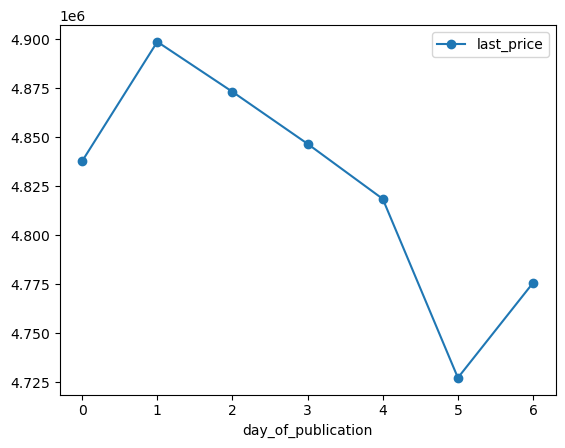

In [43]:
data.pivot_table(index = 'day_of_publication',values = 'last_price').plot(style = 'o-');

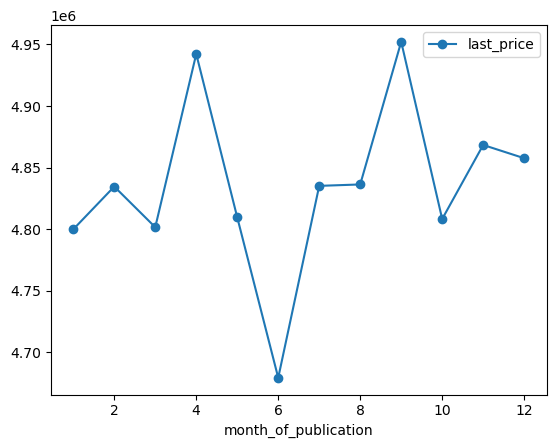

In [44]:
data.pivot_table(index = 'month_of_publication',values = 'last_price').plot(style = 'o-');

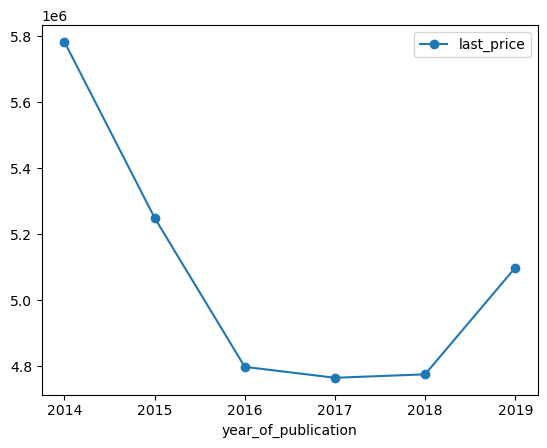

In [45]:
data.pivot_table(index = 'year_of_publication',values = 'last_price').plot(style = 'o-');

The most expensive apartments for sale are on Tuesday and Wednesday, the lowest prices are on Friday

Apartments offered in April and September have the highest price, in June the lowest

From 2014 to 2016 there was a decline in the real estate market, from 2016 to 2018 the market stagnated and since 2018 it has shown growth again

In [46]:
sqm_price = data.pivot_table(index='locality_name', values='sqm_price', aggfunc=['count', 'median'])
sqm_price.columns = ['count', 'median']
sqm_price.sort_values('count', ascending=False).head(10)

,count,median
locality_name,,
Санкт-Петербург,15651,104774.535809
Населённый пункт Мурино,552,86059.293995
Населённый пункт Шушары,439,76829.268293
Всеволожск,398,65789.473684
Пушкин,369,100000.000000
Колпино,338,74723.748474
Населённый пункт Парголово,327,91642.857143
Гатчина,307,67796.610169
Населённый пункт Кудрово,299,91860.465116


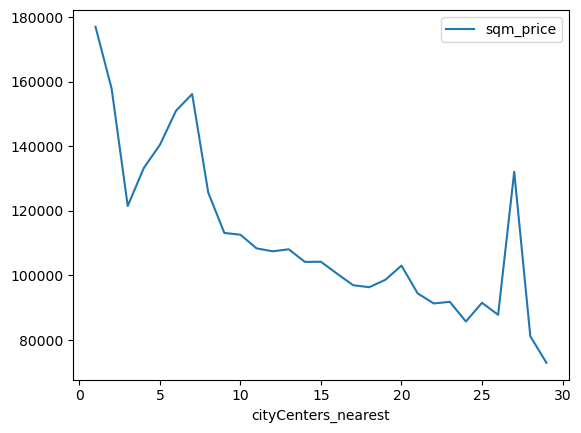

In [47]:
pivot_table_km = data.query('locality_name == "Санкт-Петербург" and cityCenters_nearest !=0').pivot_table(index = 'cityCenters_nearest', values = 'sqm_price', aggfunc = 'mean')
pivot_table_km.plot();

After 9 km price per sq.m. decreases. There is a peak in the area of 27 kilometers (presumably this could be an elite area on the shores of the of Finland Bay)

### General conclusion

Work was carried out in the database to fill in gaps and work with data types.
Implicit duplicates in the names of settlements have been worked out.
New columns were added to the dataframe and data analysis was performed.


Apartment sale deadline

Most often, an apartment is sold in 95 days. If it's less than 45 days, it's fast; if it's longer than 230 days, it's long.
There are a large number of apartments sold in just a few days after publication.
There are also options that have been on sale for several dozen months.

Factors affecting cost

The cost is influenced more by the area of the apartment than by the number of rooms. The first floor is much cheaper than other options. Also, the cost of an apartment on the top floor is lower than on the rest, except the first.
With the exception of a few peaks, the price in the city center is higher and decreases with distance

Advertisements published in April and September and on weekdays have a high price. Most likely, people with expensive real estate prefer not to sell on weekends and the holiday season.

Cost per square meter in the top 10 settlements

The most expensive square meter in St. Petersburg is 114848
The cheapest square meter in Vyborg - 58141